In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
foldername = '/work/vita/ahmad_rh/ACEs'

with open(foldername + "/bl_ACEs.pkl", "rb") as f:
    bl_NC_ACEs, bl_IC_ACEs, bl_DC_ACEs, bl_Ignored_ACEs = pickle.load(f)
with open(foldername + "/augment_ACEs.pkl", "rb") as f:
    aug_NC_ACEs, aug_IC_ACEs, aug_DC_ACEs, aug_Ignored_ACEs = pickle.load(f)
with open(foldername + "/contrastive_ACEs.pkl", "rb") as f:
    con_NC_ACEs, con_IC_ACEs, con_DC_ACEs, con_Ignored_ACEs = pickle.load(f)
with open(foldername + "/ranking2_ACEs.pkl", "rb") as f:
    rank_NC_ACEs, rank_IC_ACEs, rank_DC_ACEs, rank_Ignored_ACEs = pickle.load(f)

In [4]:
rank_NC_ACEs

array([[3.4316607e-02, 1.8303166e-03, 3.6146924e-02],
       [6.4581253e-02, 8.4054992e-03, 7.2986752e-02],
       [6.1391599e-02, 2.2999567e-03, 6.3691556e-02],
       ...,
       [1.1174558e-02, 3.2886486e-03, 1.4463207e-02],
       [6.5297242e-03, 1.3421269e-02, 1.9950993e-02],
       [2.6165843e-01, 6.4571701e-08, 2.6165849e-01]], dtype=float32)

In [53]:
CE = np.concatenate([bl_NC_ACEs[:, 1], bl_IC_ACEs[:, 1], bl_DC_ACEs[:, 1], bl_Ignored_ACEs[:, 1]])
# bins = np.array([CE.min(), np.percentile(CE, 10), np.percentile(CE, 25), np.percentile(CE, 50), CE.max()])
bins = np.array([CE.min(), np.percentile(CE, 10), np.percentile(CE, 25), np.percentile(CE, 50), np.percentile(CE, 75)])

def preprocess(NC_ACEs, IC_ACEs, DC_ACEs, Ignored_ACEs):
    ys = []
    ACEs = np.concatenate([NC_ACEs, DC_ACEs, IC_ACEs, Ignored_ACEs])
    for i in range(len(bins) - 1):
        # bin_mask = (ACEs[:, 1] >= bins[i]) & (ACEs[:, 1] < bins[i + 1])
        bin_mask = (ACEs[:, 1] < bins[i + 1])
        ys.append(ACEs[bin_mask, 0].mean())
    return np.asarray(ys)


ys_bl = preprocess(bl_NC_ACEs, bl_IC_ACEs, bl_DC_ACEs, bl_Ignored_ACEs)
ys_aug = preprocess(aug_NC_ACEs, aug_IC_ACEs, aug_DC_ACEs, aug_Ignored_ACEs)
ys_con = preprocess(con_NC_ACEs, con_IC_ACEs, con_DC_ACEs, con_Ignored_ACEs)
ys_rank = preprocess(rank_NC_ACEs, rank_IC_ACEs, rank_DC_ACEs, rank_Ignored_ACEs)

d_aug = ys_bl - ys_aug
d_con = ys_bl - ys_con
d_rank = ys_bl - ys_rank


[[ 0.00562899  0.00355553  0.00210045  0.00068204]
 [ 0.00578173  0.00109706 -0.00080714  0.00081483]
 [ 0.01080828  0.00906594  0.00735979  0.00486411]]
        10%       25%       50%       75%    Method
0  0.005629  0.003556  0.002100  0.000682   Augment
1  0.005782  0.001097 -0.000807  0.000815  Contrast
2  0.010808  0.009066  0.007360  0.004864   Ranking


<AxesSubplot:>

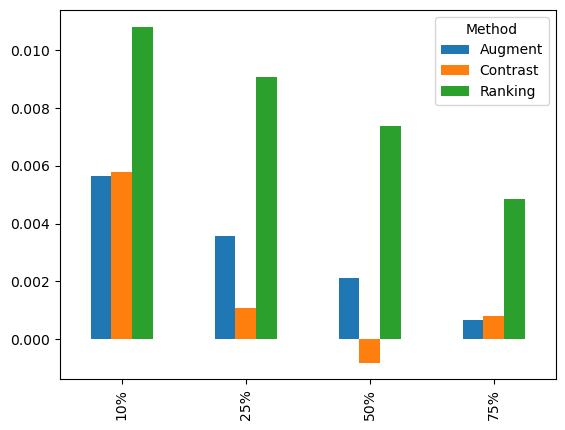

In [54]:
data = np.stack([d_aug, d_con, d_rank])
print(data)

df = pd.DataFrame(data, columns = ['10%', '25%','50%', '75%'])
# df = pd.DataFrame(data, columns = ['10%', '25%','50%', '100%'])

name = ['Augment', 'Contrast', 'Ranking']

df['Method'] = name

print(df)

df.set_index("Method").T.plot(kind='bar')

[[0.04446311 0.05187946 0.08752173 0.14915778]
 [0.03883412 0.04832393 0.08542128 0.14847574]
 [0.03868138 0.0507824  0.08832888 0.14834295]
 [0.03365483 0.04281352 0.08016194 0.14429367]]
        10%       25%       50%       75%    Method
0  0.044463  0.051879  0.087522  0.149158  baseline
1  0.038834  0.048324  0.085421  0.148476   augment
2  0.038681  0.050782  0.088329  0.148343  contrast
3  0.033655  0.042814  0.080162  0.144294   ranking


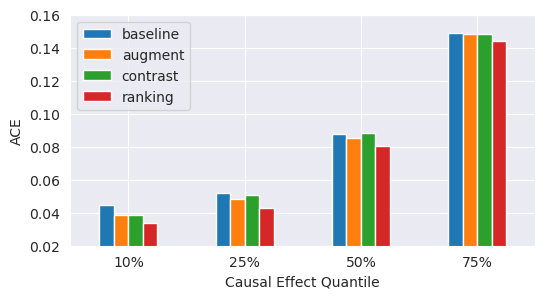

In [233]:
data = np.stack([ys_bl, ys_aug, ys_con, ys_rank])
print(data)

# df = pd.DataFrame(data, columns = ['10%', '25%','50%', '100%'])
df = pd.DataFrame(data, columns = ['10%', '25%','50%', '75%'])

name = ['baseline', 'augment', 'contrast', 'ranking']

df['Method'] = name

print(df)

sns.set_style("darkgrid")

barplot = df.set_index("Method").T.plot(kind='bar', xlabel='Causal Effect Quantile', ylabel='ACE', figsize=(5.9, 3))
plt.xticks(rotation='horizontal')
plt.legend(loc=2)
plt.ylim([0.02, 0.16])

# barplot = sns.barplot(x=index, hue="Method")

fig = barplot.get_figure()
fig.set_size_inches(6, 3)

figname = '../../docs/quantitative_ace.pdf'
fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0.1)

[[0.27 0.34]
 [0.25 0.31]
 [0.27 0.32]
 [0.24 0.31]]
   OOD-Density  OOD-Context    Method
0         0.27         0.34  Baseline
1         0.25         0.31   Augment
2         0.27         0.32  Contrast
3         0.24         0.31   Ranking


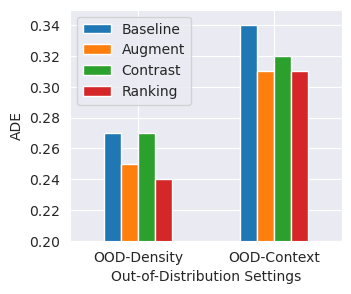

In [117]:
data = np.stack([[0.27, 0.25, 0.27, 0.24], [0.34, 0.31, 0.32, 0.31]]).T
print(data)

# # df = pd.DataFrame(data, columns = ['10%', '25%','50%', '100%'])
df = pd.DataFrame(data, columns = ['OOD-Density', 'OOD-Context'])

name = ['Baseline', 'Augment', 'Contrast', 'Ranking']

df['Method'] = name

print(df)

sns.set_style("darkgrid")

barplot = df.set_index("Method").T.plot(kind='bar', xlabel='Out-of-Distribution Settings', ylabel='ADE', figsize=(3.5, 3))
plt.xticks(rotation='horizontal')
plt.legend(loc=2)
plt.ylim([0.2, 0.35])

fig = barplot.get_figure()
fig.set_size_inches(3.5, 3)

figname = '../../docs/quantitative_ood.pdf'
fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0.1)

In [136]:
foldername = '/work/vita/ahmad_rh'

with open(foldername + "/NC_removal_CE.pkl", "rb") as f:
    data = pickle.load(f)

df = pd.DataFrame(data, columns = ['NC', 'Effect'])
df = df[df['NC'] < 5]
dfg = df.groupby(['NC']).mean()
dfg

,Effect
NC,
1,0.005894
2,0.320680
3,0.458669
4,0.623481


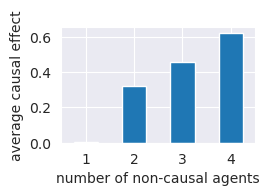

In [151]:
barplot = dfg.plot(kind='bar', legend=False, xlabel='number of non-causal agents', ylabel='average causal effect', figsize=(2.5, 1.5))
plt.xticks(rotation='horizontal')
# plt.legend('off')
# plt.xlim([0, 4.5])

fig = barplot.get_figure()
fig.set_size_inches(2.5, 1.5)

figname = '../../docs/nc.pdf'
fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0.1)

In [250]:
foldername = '/work/vita/ahmad_rh'


# /work/vita/ahmad_rh/ade_fde_df.pkl 

with open(foldername + "/ade_fde_df.pkl", "rb") as f:
    data = pickle.load(f)


df = data[0]
df = df.iloc[:, [0,4,1,2]]

df

,Baseline,Augment Scratch,Contrastive 1000,Ranking 1000 0.001
"v2 (1.31, 8.83, 12.03)",0.254767,0.242628,0.252945,0.234650
"1.1 (6.01, 11.29, 20.51)",0.311313,0.293367,0.312897,0.286229
"1.2 (7.50, 17.42, 28.93)",0.420239,0.411687,0.420080,0.396401
"2.1 (6.42, 10.80, 20.39)",0.268992,0.252994,0.270977,0.243761
"2.2 (7.65, 17.03, 28.91)",0.342871,0.332025,0.336145,0.317276
"3.1 (7.95, 9.17, 20.47)",0.257929,0.244973,0.251646,0.239198
"3.2 (9.47, 14.82, 28.98)",0.305567,0.301447,0.305769,0.283666
"walkway.1 (6.62, 9.80, 20.53)",0.273617,0.253770,0.260117,0.254355
"walkway.2 (8.23, 15.31, 29.01)",0.338612,0.310960,0.321584,0.309673
"noncausal_lf (9.85, 7.20, 19.13)",0.264308,0.253265,0.262765,0.254588


In [252]:
df['gain'] = df['Ranking 1000 0.001'] / df['Augment Scratch']
df = df.sort_values(by='gain')
df = df.iloc[[0,1,3], :]
df

,Baseline,Augment Scratch,Contrastive 1000,Ranking 1000 0.001,gain
"3.2 (9.47, 14.82, 28.98)",0.305567,0.301447,0.305769,0.283666,0.941014
"noncausal_circle (6.71, 9.74, 19.03)",0.267427,0.263113,0.263919,0.249570,0.948525
"1.2 (7.50, 17.42, 28.93)",0.420239,0.411687,0.420080,0.396401,0.962871


In [253]:
df = df.rename(index={df.index[0]: "density", df.index[1]: "context", df.index[2]: "density+conext"})
df = df.sort_values(by='Baseline')
df = df.iloc[:, :-1]
df

,Baseline,Augment Scratch,Contrastive 1000,Ranking 1000 0.001
context,0.267427,0.263113,0.263919,0.249570
density,0.305567,0.301447,0.305769,0.283666
density+conext,0.420239,0.411687,0.420080,0.396401


In [254]:
df = df.rename(columns={df.columns[0]: "baseline", df.columns[1]: "augment", df.columns[2]: "contrast", df.columns[3]: "ranking"})

df
# df.columns
# df.rename(columns={"A": "a", "B": "b", "C": "c"}

,baseline,augment,contrast,ranking
context,0.267427,0.263113,0.263919,0.249570
density,0.305567,0.301447,0.305769,0.283666
density+conext,0.420239,0.411687,0.420080,0.396401


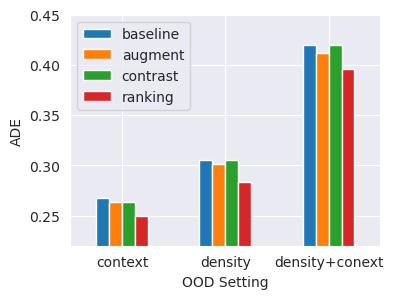

In [258]:
barplot = df.plot(kind='bar', xlabel='OOD Setting', ylabel='ADE', figsize=(4.1,3))
plt.xticks(rotation='horizontal')
plt.legend(loc=2)
plt.ylim([0.22, 0.45])

fig = barplot.get_figure()
fig.set_size_inches(4, 3)

figname = '../../docs/quantitative_ood.pdf'
fig.savefig(figname, dpi=300, bbox_inches='tight', pad_inches=0.1)